<a href="https://colab.research.google.com/github/tortolla/neuromorphy/blob/main/aprox_hell_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#считываем данные графика из файла
filename = '/content/calibration1.txt'
import numpy as np
import matplotlib as plt

def read_arrays_from_file(filename):
    array1 = np.array(())
    array2 = np.array(())

    with open(filename, 'r') as file:
        for line in file:
            values = line.split()
            if len(values) == 2:
                array1 = np.append(array1, float(values[0]))
                array2 = np.append(array2, float(values[1]))


    return array1, array2



array1, array2 = read_arrays_from_file(filename)
print(array1)
print(array2)


[0.13679683 0.13695985 0.13701172 ... 0.08749135 0.08556478 0.08504609]
[1.46232128e-01 3.42893124e-01 5.38884878e-01 ... 1.49467019e+04
 1.49478449e+04 1.49489962e+04]


Text(0.5, 1.0, 'Единичный импульс')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


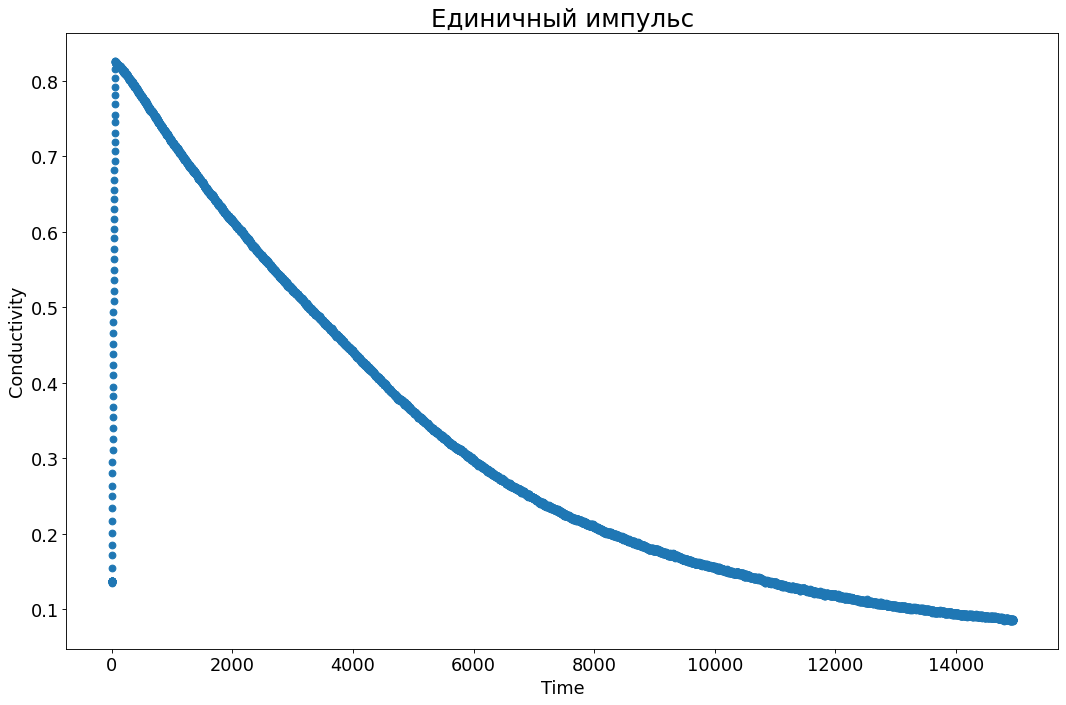

In [4]:
#строим график единичного импульса
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(array2, array1) #array2 - time
plt.gca().set(xlabel = 'Time', ylabel = 'Conductivity')
plt.title("Единичный импульс", fontsize=22)

Text(0.5, 1.0, 'Релаксация')

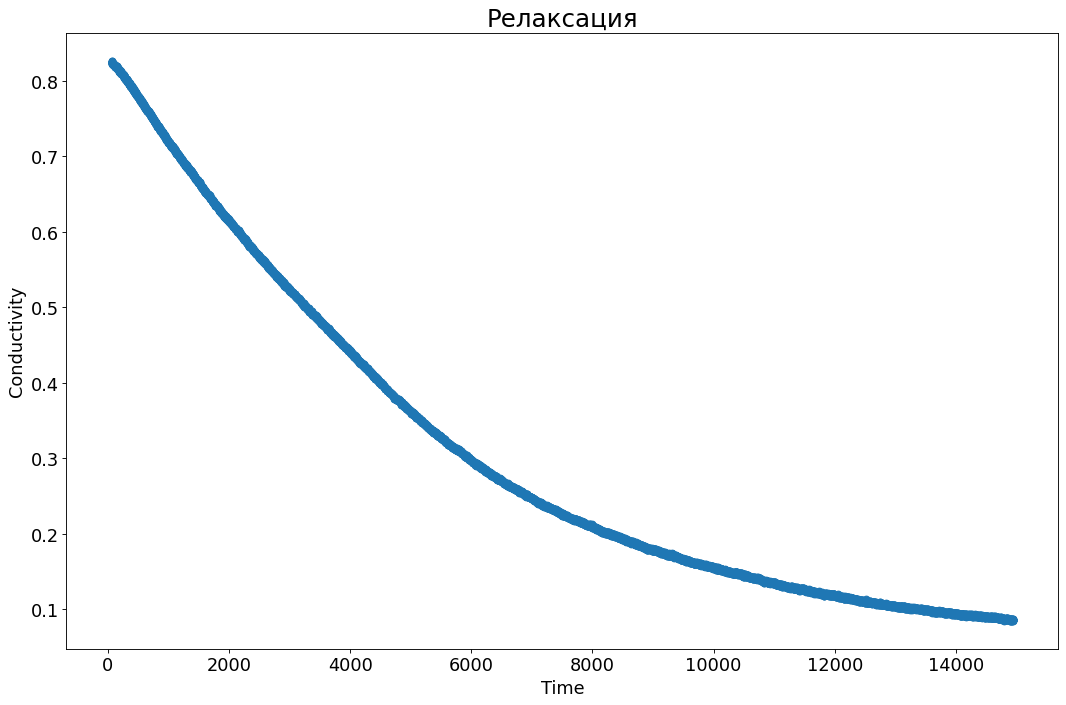

In [5]:
index = array1.argmax(axis=0)

array1 = array1[index:]
array2 = array2[index:]
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(array2, array1)
plt.gca().set(xlabel = 'Time', ylabel = 'Conductivity')
plt.title("Релаксация", fontsize=22)

In [22]:
from scipy.optimize import curve_fit

def double_exponential_approximation(x, y, constant):
    # Определение функции аппроксимации
    p = constant / array1[0]
    y = array1 * p

    def func(x, A, B, C, D):
        return A * np.exp(B * (-x)) + C * np.exp(D * (-x))

    # Аппроксимация значений y
    popt, _ = curve_fit(func, x, y, p0=[ 1, 0.002, 0.01, 0.01])

    # Построение графика
    #plt.scatter(x, y, label='Данные')
    #plt.plot(x, func(x, *popt), 'r', label='Аппроксимация')
    #plt.xlabel('Time')
    #plt.ylabel('Conductivity')
    #plt.title("Апроксимация релаксации", fontsize=22)
    #plt.legend()
    #plt.show()

    # Вывод коэффициентов аппроксимирующей кривой
    return popt



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
double_exponential_approximation(array2, array1)

In [ ]:
import csv


def write_to_file(data, filename):
    with open(filename, 'a', newline='') as file:
        writer = csv.writer(file, delimiter=' ')
        writer.writerow(data)

param = np.array(())

for i in range(0,255):
  print(i)
  param = double_exponential_approximation(array2, array1, i)
  arr = np.insert(param, 0, i)
  print(arr)
  write_to_file(arr, 'aprox.csv')

In [34]:
column1 = []
column2 = []
column3 = []
column4 = []
column5 = []

with open("aprox.csv", "r") as file:
    reader = csv.reader(file)

    # Пропускаем первую строку
    next(reader)

    for row in reader:
        values = row[0].split()  # Разделяем строку на отдельные значения

        try:
            column1.append(float(values[0]))
        except ValueError:
            column1.append(None)

        try:
            column2.append(float(values[1]))
        except ValueError:
            column2.append(None)

        try:
            column3.append(float(values[2]))
        except ValueError:
            column3.append(None)

        try:
            column4.append(float(values[3]))
        except ValueError:
            column4.append(None)

        try:
            column5.append(float(values[4]))
        except ValueError:
            column5.append(None)

# Выводим результат
print("Столбец 1:", column1)
print("Столбец 2:", column2)
print("Столбец 3:", column3)
print("Столбец 4:", column4)
print("Столбец 5:", column5)


Столбец 1: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.

<ipython-input-8-e6d8663a08c0>:6: RuntimeWarning: overflow encountered in exp
  return A * np.exp(B * (-x)) + C * np.exp(D * (-x))
<ipython-input-8-e6d8663a08c0>:6: RuntimeWarning: overflow encountered in multiply
  return A * np.exp(B * (-x)) + C * np.exp(D * (-x))


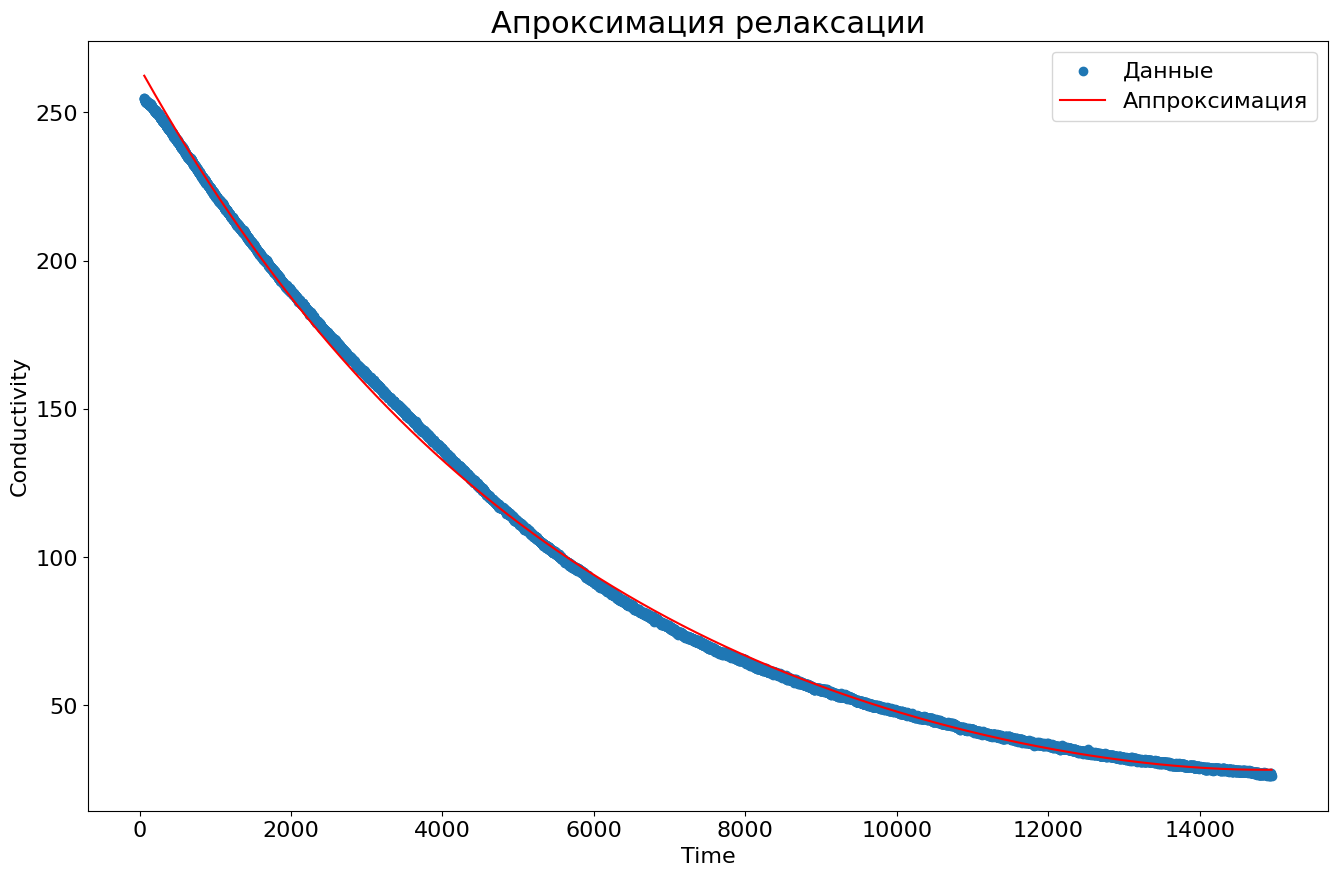

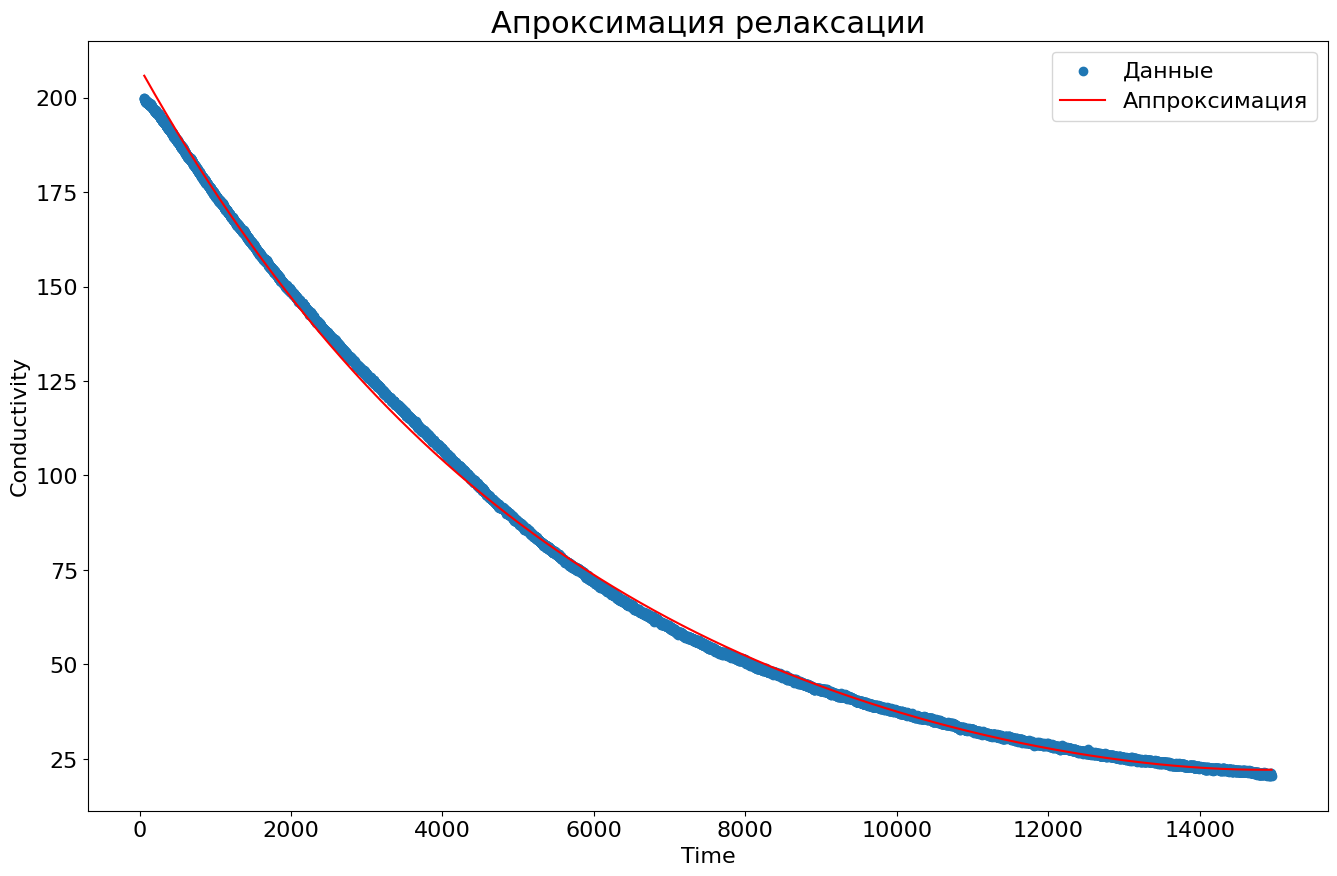

array([ 8.69351042e-03, -4.42821619e-04,  2.07979088e+02,  1.73210399e-04])

In [11]:
constant = 255 / array1[0]
a = 200 / array1[0]

array_scale = array1 * constant
varray_scale = array1 * a
double_exponential_approximation(array2, array_scale)
double_exponential_approximation(array2, varray_scale)

In [ ]:
from scipy.optimize import curve_fit

def double_exponential_approximation_1(x, y):
    # Определение функции аппроксимации
    def func(x, A, B, C, D):
        return y[0] * ( A * np.exp(B * (-x)) + C * np.exp(D * (-x)))

    def func1(x, A, B, C, D):
        return 1.8 * ( A * np.exp(B * (-x)) + C * np.exp(D * (-x)))

    def func2(x, A, B, C, D):
        return 10 * ( A * np.exp(B * (-x)) + C * np.exp(D * (-x)))

    def func3(x, A, B, C, D):
        return 50 * ( A * np.exp(B * (-x)) + C * np.exp(D * (-x)))

    # Аппроксимация значений y
    popt, _ = curve_fit(func, x, y, p0=[ 1, 0.002, 0.01, 0.01])

    # Построение графика
    plt.scatter(x, y, label='Данные')
    plt.plot(x, func(x, *popt), 'r', label='Аппроксимация')
    plt.plot(x, func1(x, *popt), 'r', label='Аппроксимация - 1.8')
    plt.plot(x, func2(x, *popt), 'r', label='Аппроксимация - 10')
    plt.plot(x, func3(x, *popt), 'r', label='Аппроксимация - 50')
    plt.xlabel('Time')
    plt.ylabel('Conductivity')
    plt.title("Апроксимация релаксации", fontsize=22)
    plt.legend()
    plt.show()

    # Вывод коэффициентов аппроксимирующей кривой
    return popt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-77-51835776af07>:6: RuntimeWarning: overflow encountered in exp
  return y[0] * ( A * np.exp(B * (-x)) + C * np.exp(D * (-x)))


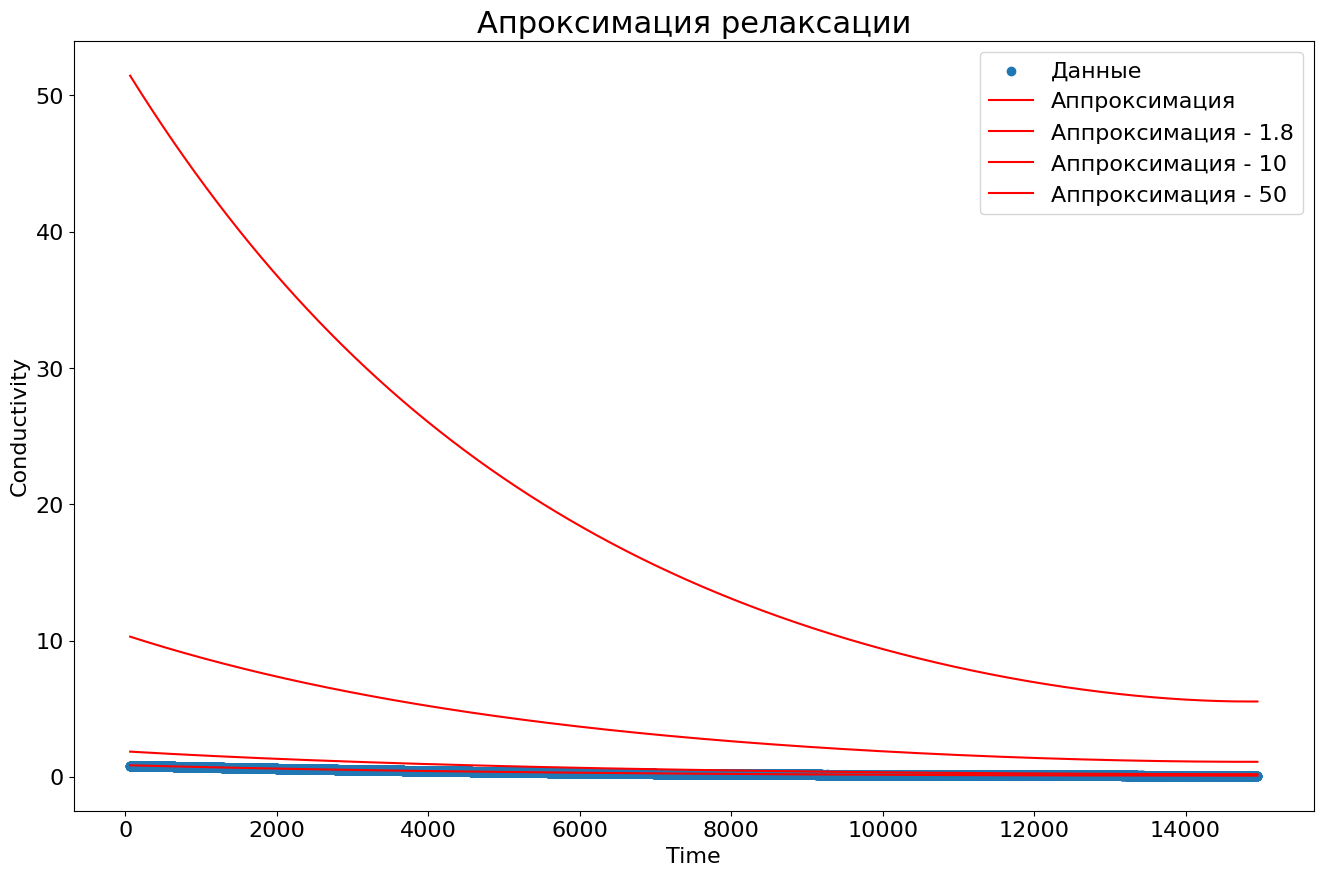

array([ 1.03989559e+00,  1.73210495e-04,  4.34769135e-05, -4.42806543e-04])

In [ ]:
double_exponential_approximation_1(array2, array1)